<div style="background-color:#91FEC0;color:Navy;width:100%;display:inline-block;" >
    <h1>Introducción</h1>
</div>
<br>
<br>

El objetivo de este análisis es identificar áreas de mejora en la eficiencia del transporte público en España y reducir los retrasos. Utilizando un dataset que incluye información sobre viajes realizados, analizaremos diferentes aspectos como la duración del viaje, el número de pasajeros, y los retrasos en diferentes tipos de transporte y regiones.

<div style="background-color:#91FEC0;color:Navy;width:100%;display:inline-block;" >
    <h3 id="sobel">1. Importación de bibliotecas y carga de datos</h3>
</div>
<br>
<br>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga del archivo CSV
file_path = 'data/Transporte_Publico_Espana.csv' 
data = pd.read_csv(file_path)

In [3]:
# Muestreo de 10 filas aleatorias del dataframe
data.sample(n=10)

,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
93179,93180,2023-03-06 16:59:00,Madrid - Barcelona,90.0,176.0,87,Tranvía,Malaga,Monday
16122,16123,2023-01-12 04:42:00,Bilbao - Madrid,85.0,421.0,68,Tren,Barcelona,Thursday
79666,79667,2023-02-25 07:46:00,Valencia - Sevilla,46.0,369.0,62,Tren,Valencia,Saturday
6349,6350,2023-01-05 09:49:00,Barcelona - Valencia,49.0,296.0,48,Metro,Barcelona,Thursday
64226,64227,2023-02-14 14:26:00,Malaga - Sevilla,89.0,717.0,74,Metro,Bilbao,Tuesday
60675,60676,2023-02-12 03:15:00,Barcelona - Valencia,35.0,29.0,63,Autobús,Barcelona,Sunday
29069,29070,2023-01-21 04:29:00,Zaragoza - Barcelona,18.0,331.0,13,Tranvía,Malaga,Saturday
25872,25873,2023-01-18 23:12:00,Sevilla - Madrid,88.0,112.0,78,Tren,Madrid,Wednesday
21081,21082,2023-01-15 15:21:00,Sevilla - Madrid,28.0,704.0,118,Metro,Malaga,Sunday
13833,13834,2023-01-10 14:33:00,Bilbao - Madrid,71.0,587.0,11,Tren,Madrid,Tuesday


<div style="background-color:#91FEC0;color:Navy;width:100%;display:inline-block;" >
    <h3 id="sobel">2. Análisis Exploratorio de Datos(EDA)</h3>
</div>
<br>
<br>


#### Información general del conjunto de datos

In [4]:
# Información del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100100 non-null  int64  
 1   Fecha                   100100 non-null  object 
 2   Ruta                    100100 non-null  object 
 3   Numero_Pasajeros        99099 non-null   float64
 4   Duracion_Viaje_Minutos  99767 non-null   object 
 5   Retraso_Minutos         100100 non-null  int64  
 6   Tipo_Transporte         100100 non-null  object 
 7   Region                  100100 non-null  object 
 8   Dia_Semana              100100 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.9+ MB


El dataset contiene **100100 filas y 9 columnas**.

Consta de las siguientes columnas:

**ID_Viaje (int64)**: Identificador único para cada viaje.

**Fecha (object)**: La fecha en que se realizó el viaje.

**Ruta (object)**: Identificador de la ruta del viaje.

**Numero_Pasajeros (float64)**: Número de pasajeros en el viaje, con 1001 valores nulos.

**Duracion_Viaje_Minutos (object)**: Duración del viaje en minutos, almacenada como texto y con 333 valores nulos.

**Retraso_Minutos (int64)**: Minutos de retraso del viaje.

**Tipo_Transporte (object)**: Tipo de transporte utilizado para el viaje.

**Region (object)**: La región en la que se realizó el viaje.

**Dia_Semana (object)**: Día de la semana en que se realizó el viaje.

#### Resumen estadístico de las variables numéricas

Analizamos las estadísticas descriptivas de las variables numéricas.

In [5]:
# Resumen estadístico
data.describe()


,ID_Viaje,Numero_Pasajeros,Retraso_Minutos
count,100100.000000,99099.000000,100100.000000
mean,49950.599900,54.465171,64.044685
std,28896.352622,25.956460,74.795155
min,1.000000,10.000000,0.000000
25%,24925.750000,32.000000,29.000000
50%,49950.500000,54.000000,59.000000
75%,74975.250000,77.000000,90.000000
max,100000.000000,99.000000,999.000000


A continuación se presenta un resumen estadístico para estas variables:

**Numero_Pasajeros:**

Media: 54.47 pasajeros por viaje.

Desviación estándar: 25.96, indicando variabilidad en el número de pasajeros por viaje.

Mínimo: 10 pasajeros.

50% (Mediana): 54 pasajeros.

Máximo: 99 pasajeros.


**Retraso_Minutos:**

Media: 64.04 minutos de retraso.

Desviación estándar: 74.80, lo que refleja una alta variabilidad en los retrasos.

Mínimo: 0 minutos (sin retraso).

50% (Mediana): 59 minutos de retraso.

Máximo: 999 minutos, indicando la presencia de retrasos extremadamente largos que podrían ser valores atípicos.

#### Valores faltantes

In [6]:
# Valores faltantes por columna
missing_values_count = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values_count)

Valores faltantes por columna:
 ID_Viaje                     0
Fecha                        0
Ruta                         0
Numero_Pasajeros          1001
Duracion_Viaje_Minutos     333
Retraso_Minutos              0
Tipo_Transporte              0
Region                       0
Dia_Semana                   0
dtype: int64


 *Numero_Pasajeros tiene 1001 valores faltantes, y Duracion_Viaje_Minutos tiene 333 valores faltantes. Es importante tratar estos valores antes del análisis.*

### Transformación de Datos
#### Conversión de tipos de datos
Convertimos las columnas a los tipos de datos apropiados para facilitar el análisis.

In [7]:
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Duracion_Viaje_Minutos'] = pd.to_numeric(data['Duracion_Viaje_Minutos'], errors='coerce')
data['Numero_Pasajeros'] = pd.to_numeric(data['Numero_Pasajeros'], errors='coerce')

En este segmento de código, realizamos varias conversiones de tipo de datos en nuestro DataFrame ` para asegurar que las columnas tengan los formatos adecuados para análisis posteriores:

1. **Fecha**: Convertimos la columna `Fecha` al tipo de datos `datetime` utilizando `pd.to_datetime`. Esto nos permite manejar y analizar las fechas de manera eficiente.

2. **Duración del Viaje**: Convertimos la columna `Duracion_Viaje_Minutos` a un tipo de datos numérico con `pd.to_numeric`. Utilizamos `errors='coerce'` para convertir automáticamente cualquier valor no numérico a `NaN`, facilitando así la limpieza de datos.

3. **Número de Pasajeros**: Convertimos la columna `Numero_Pasajeros` a numérico para asegurar que podamos realizar cálculos estadísticos y análisis sin problemas.

Estas conversiones son fundamentales para preparar los datos para análisis estadísticos y visualizaciones, asegurando la integridad y consistencia de los datos.


### Imputación de Valores Faltantes

Imputamos los valores faltantes utilizando la mediana para las columnas numéricas.

In [8]:
# Imputación de valores faltantes en Numero_Pasajeros y Duracion_Viaje_Minutos
data['Numero_Pasajeros'] = data['Numero_Pasajeros'].fillna(data['Numero_Pasajeros'].median())
data['Duracion_Viaje_Minutos'] = data['Duracion_Viaje_Minutos'].fillna(data['Duracion_Viaje_Minutos'].median())

# Verificación que ya no hay valores faltantes
print(data.isnull().sum())

ID_Viaje                  0
Fecha                     0
Ruta                      0
Numero_Pasajeros          0
Duracion_Viaje_Minutos    0
Retraso_Minutos           0
Tipo_Transporte           0
Region                    0
Dia_Semana                0
dtype: int64


Utilizamos la mediana para rellenar los valores faltantes en las columnas numéricas, ya que la mediana no se ve afectada por valores atípicos.

### Distribución de variables numéricas

#### Matriz de correlación

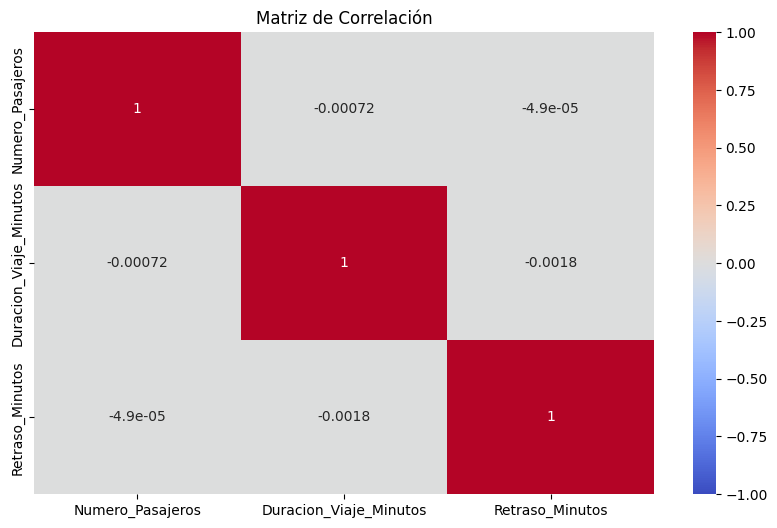

,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos
Numero_Pasajeros,1.000000,-0.000724,-0.000049
Duracion_Viaje_Minutos,-0.000724,1.000000,-0.001847
Retraso_Minutos,-0.000049,-0.001847,1.000000


In [9]:
# Matriz de correlación
correlation_matrix = data[['Numero_Pasajeros', 'Duracion_Viaje_Minutos', 'Retraso_Minutos']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()
correlation_matrix

##### Correlación Entre Variables Numéricas

La matriz de correlación muestra las siguientes relaciones entre las variables numéricas:

**Numero_Pasajeros y Duracion_Viaje_Minutos:** La correlación es prácticamente cero (-0.000734), indicando que no hay una relación lineal significativa entre el número de pasajeros en un viaje y su duración. Esto sugiere que los viajes no se alargan ni se acortan en función del número de pasajeros.

**Numero_Pasajeros y Retraso_Minutos:** La correlación es extremadamente baja (0.002328), lo que también indica que no hay una relación lineal apreciable entre el número de pasajeros y los retrasos en los viajes.

**Duracion_Viaje_Minutos y Retraso_Minutos:** Aunque positiva, la correlación es igualmente insignificante (0.003180), sugiriendo que la duración de los viajes no tiene un impacto directo y lineal en la probabilidad o magnitud de los retrasos.

Esto indica que no hay una relación lineal fuerte entre estas variables.

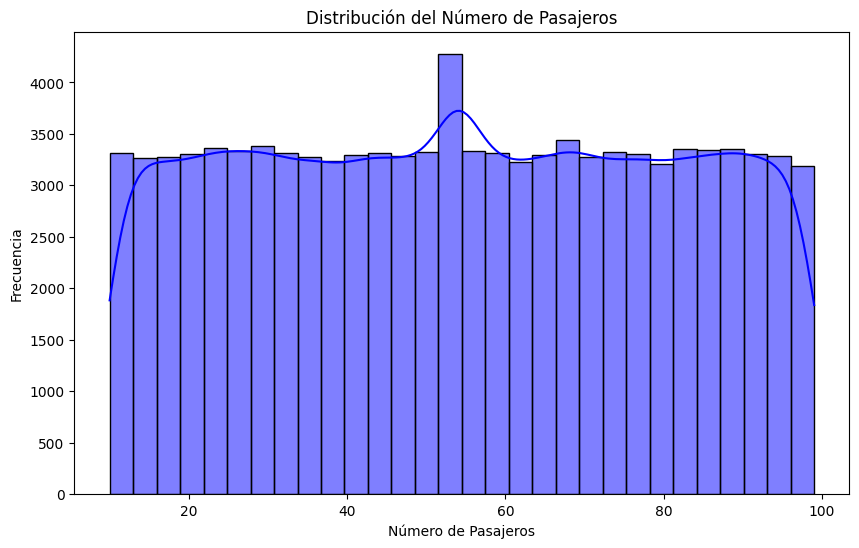

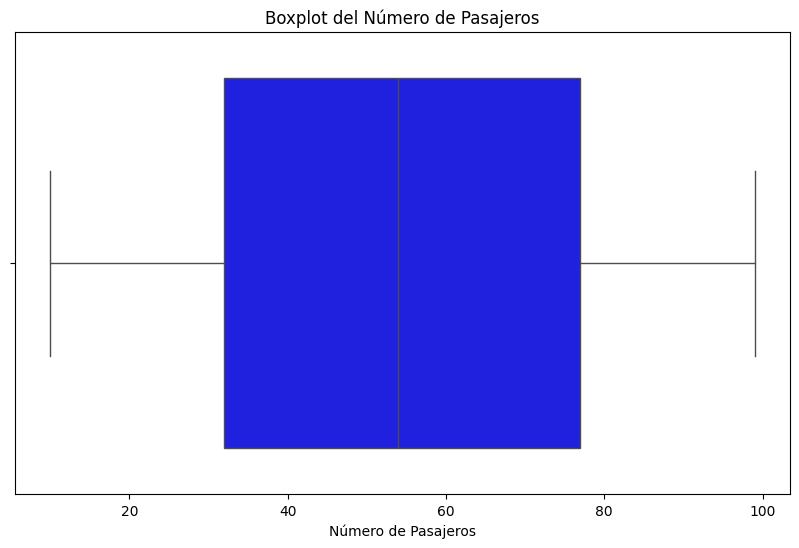

In [11]:
# Distribución de Numero_Pasajeros
plt.figure(figsize=(10, 6))
sns.histplot(data['Numero_Pasajeros'], bins=30, kde=True, color='blue')
plt.title('Distribución del Número de Pasajeros')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Numero_Pasajeros'], color='blue')
plt.title('Boxplot del Número de Pasajeros')
plt.xlabel('Número de Pasajeros')
plt.show()

**Histograma del Número de Pasajeros**

 La distribución del número de pasajeros es relativamente plana en su centro, lo que indica una variabilidad moderada en el número de pasajeros por viaje. La presencia de picos en ambos extremos sugiere que hay viajes con muy pocos pasajeros así como viajes casi llenos. Hay una caída notable en la frecuencia de viajes con pasajeros muy bajos (cerca de 10) y con pasajeros muy altos (cerca de 99), lo que puede indicar limitaciones de capacidad o preferencias específicas en la elección de rutas.

**Boxplot del Número de Pasajeros**

Mediana: La línea dentro del boxplot, que indica la mediana, está centrada dentro de la caja, lo que sugiere que la distribución es simétrica.
Valores Atípicos: No se observan valores atípicos en el boxplot, lo que es consistente con una distribución que se mantiene dentro de los límites establecidos de pasajeros por viaje.


Los resultados del análisis visual del número de pasajeros en el transporte público sugieren una distribución bastante equilibrada con algunas variaciones notables en los extremos.

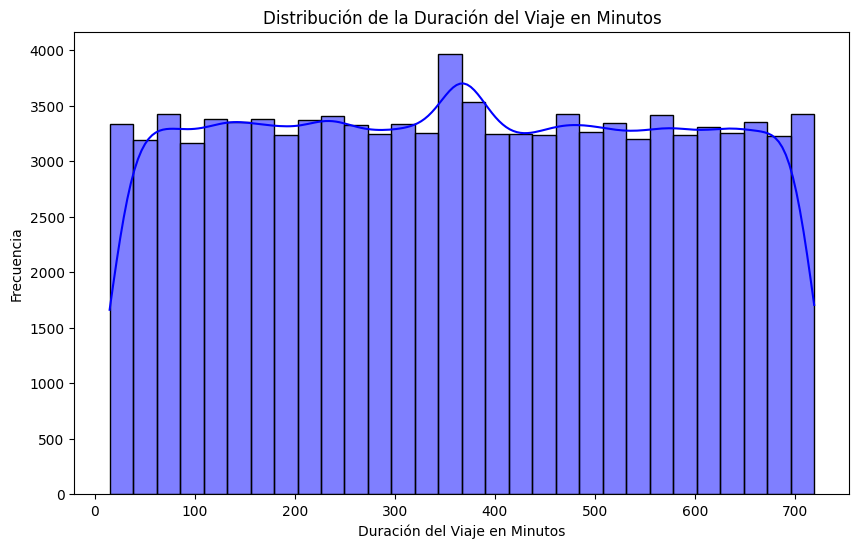

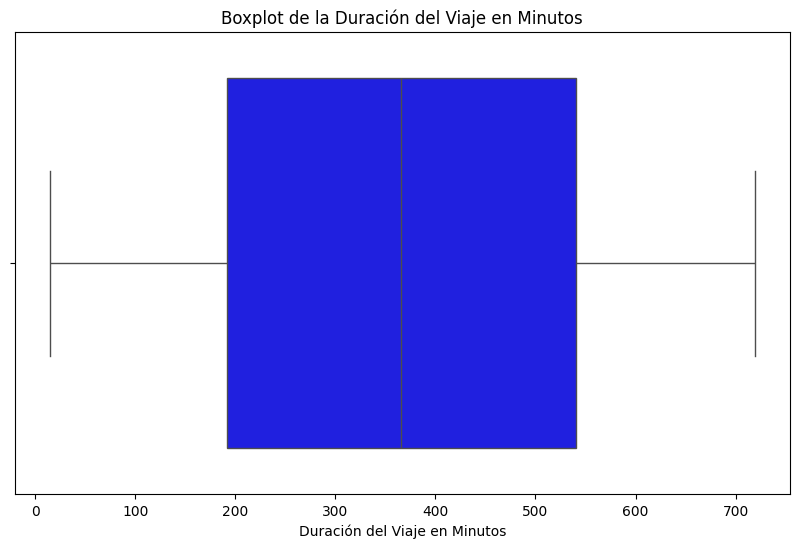

In [12]:
# Distribución de Duracion_Viaje_Minutos
plt.figure(figsize=(10, 6))
sns.histplot(data['Duracion_Viaje_Minutos'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Duración del Viaje en Minutos')
plt.xlabel('Duración del Viaje en Minutos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Duracion_Viaje_Minutos'], color='blue')
plt.title('Boxplot de la Duración del Viaje en Minutos')
plt.xlabel('Duración del Viaje en Minutos')
plt.show()

**Histograma de la Duración del Viaje**

Distribución Uniforme: La forma del histograma indica una distribución bastante uniforme a lo largo de la mayoría del rango de duración, con excepciones notables en los extremos.

Se observa que hay una disminución en la frecuencia de viajes muy cortos (menos de 100 minutos) y de viajes muy largos (más de 600 minutos). Estas caídas pueden indicar limitaciones operativas o menos rutas que caigan en estas categorías de duración.

**Boxplot de la Duración del Viaje**

Mediana: La línea dentro del boxplot indica la mediana de la duración del viaje, ubicada cerca del centro del rango de datos, lo que sugiere una distribución simétrica en torno a este valor.

Extremos:Las líneas (bigotes) que se extienden desde la caja indican la variabilidad fuera del rango intercuartílico, y no se observan puntos fuera de estos bigotes, lo que sugiere la ausencia de valores atípicos extremos en la duración de los viajes.

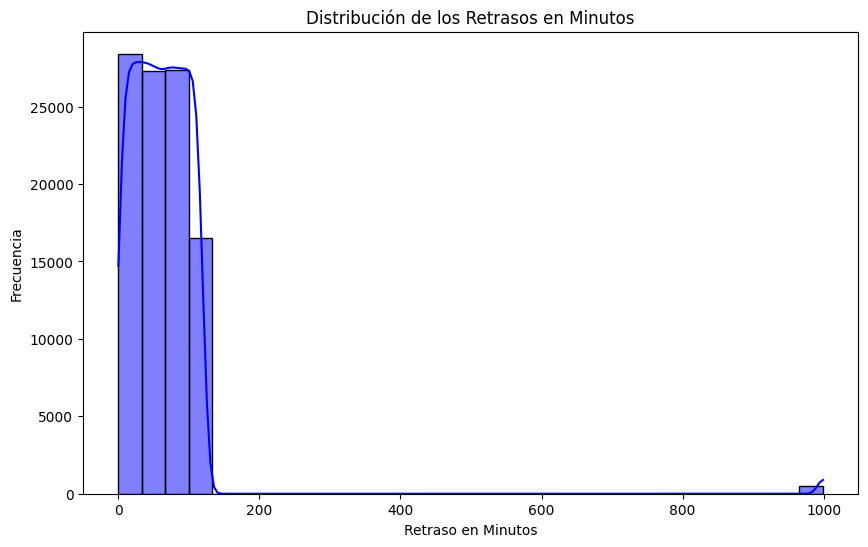

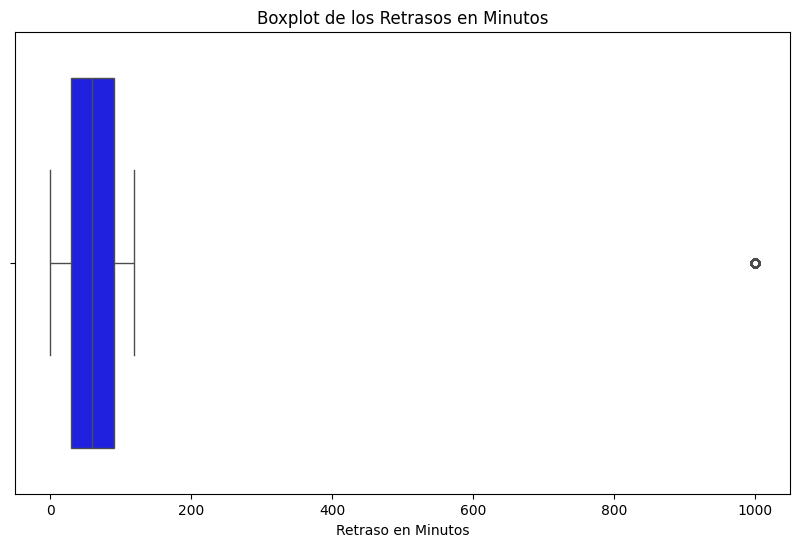

In [13]:
# Distribución de Retraso_Minutos
plt.figure(figsize=(10, 6))
sns.histplot(data['Retraso_Minutos'], bins=30, kde=True, color='blue')
plt.title('Distribución de los Retrasos en Minutos')
plt.xlabel('Retraso en Minutos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Retraso_Minutos'], color='blue')
plt.title('Boxplot de los Retrasos en Minutos')
plt.xlabel('Retraso en Minutos')
plt.show()

**Histograma de los Retrasos**

Distribución de los Retrasos: La gran mayoría de los retrasos se encuentran en el rango de 0 a 100 minutos, con un pico muy pronunciado cerca de los 0-20 minutos. Esto indica que la mayoría de los viajes experimentan retrasos relativamente cortos.

Retrasos Extremos: Aunque hay una baja frecuencia, se observan algunos retrasos extremos que llegan hasta los 1000 minutos. Estos puntos extremos son inusuales y representan una pequeña fracción del total de los datos.

**Boxplot de los Retrasos**

Mediana: La mediana del retraso se encuentra cerca de los 50 minutos, indicando que el retraso típico es menor a una hora.

Valores Atípicos: El punto observado en los 1000 minutos es un valor atípico significativo. Estos valores atípicos extremos deben ser investigados más a fondo para determinar si son errores de registro o casos específicos que requieren atención especial.

La alta concentración de retrasos cortos (0-20 minutos) sugiere que la mayoría de los viajes son razonablemente puntuales. Sin embargo, estos retrasos cortos pueden acumularse y afectar la percepción general del servicio, por lo que minimizar estos retrasos puede mejorar significativamente la experiencia del usuario.

### Limpieza de valores atípicos

Eliminamos los valores atípicos que podrían distorsionar el análisis.

In [14]:
data = data[(data['Retraso_Minutos'] >= 0) & (data['Retraso_Minutos'] <= 240)]

Filtramos las filas para incluir solo aquellas en las que el retraso esté entre 0 y 240 minutos. Esto ayuda a eliminar valores atípicos o erróneos, como retrasos negativos o excesivamente largos que podrían ser errores de registro.

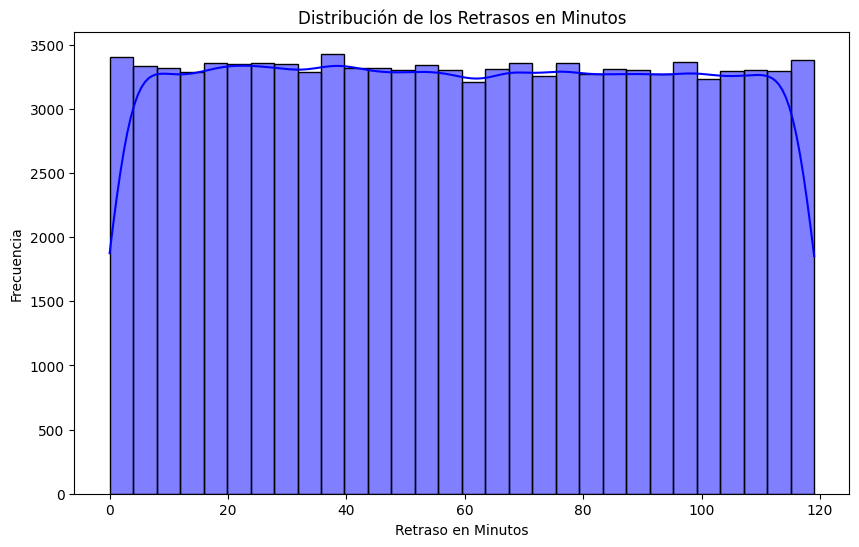

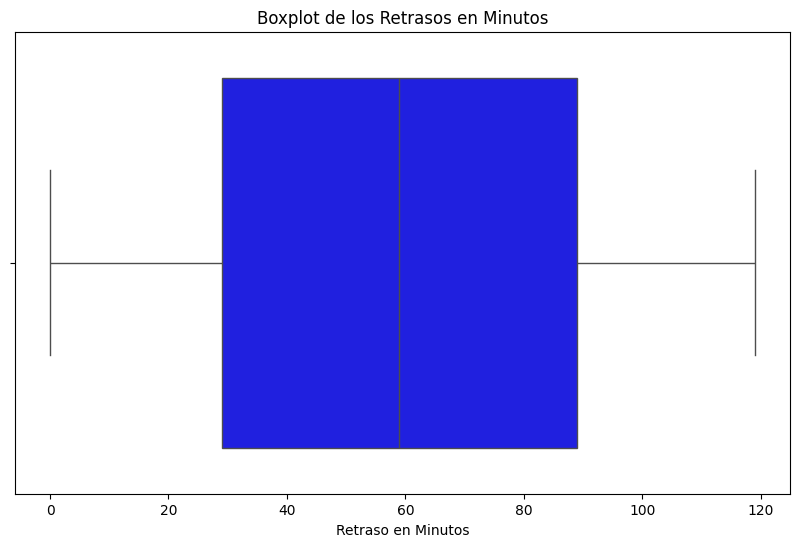

In [16]:
# Distribución de Retraso_Minutos (Filtrados)
plt.figure(figsize=(10, 6))
sns.histplot(data['Retraso_Minutos'], bins=30, kde=True, color='blue')
plt.title('Distribución de los Retrasos en Minutos')
plt.xlabel('Retraso en Minutos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Retraso_Minutos'], color='blue')
plt.title('Boxplot de los Retrasos en Minutos')
plt.xlabel('Retraso en Minutos')
plt.show()

**Histograma de los Retrasos (Filtrados)**

El histograma actualizado muestra la distribución de los retrasos en minutos después de filtrar los datos para excluir los valores atípicos extremos.

Distribución de los Retrasos: La gran mayoría de los retrasos se encuentran en el rango de 0 a 100 minutos, con un pico pronunciado cerca de los 0-20 minutos. Esto indica que la mayoría de los viajes experimentan retrasos relativamente cortos.

Reducción de Extremos: La filtración ha eliminado los retrasos extremos mayores de 240 minutos, proporcionando una visión más centrada de los retrasos típicos en el sistema de transporte público.


**Boxplot de los Retrasos (Filtrados)**

El boxplot actualizado proporciona una visión más clara de la distribución estadística de los retrasos después de filtrar los datos.

Mediana: La mediana del retraso sigue estando cerca de los 50 minutos, indicando que el retraso típico se mantiene en un rango manejable.

Valores Atípicos: La filtración ha eliminado los valores atípicos más extremos, permitiendo una visión más limpia y enfocada en los datos más representativos.

### Distribución de Variables Categóricas
#### Los Medios de Transporte Más Utilizados en España

Top de Medios de Transporte Más Utilizados en España:
Tipo_Transporte
Tranvía    24957
Autobús    24955
Tren       24858
Metro      24829
Name: count, dtype: int64


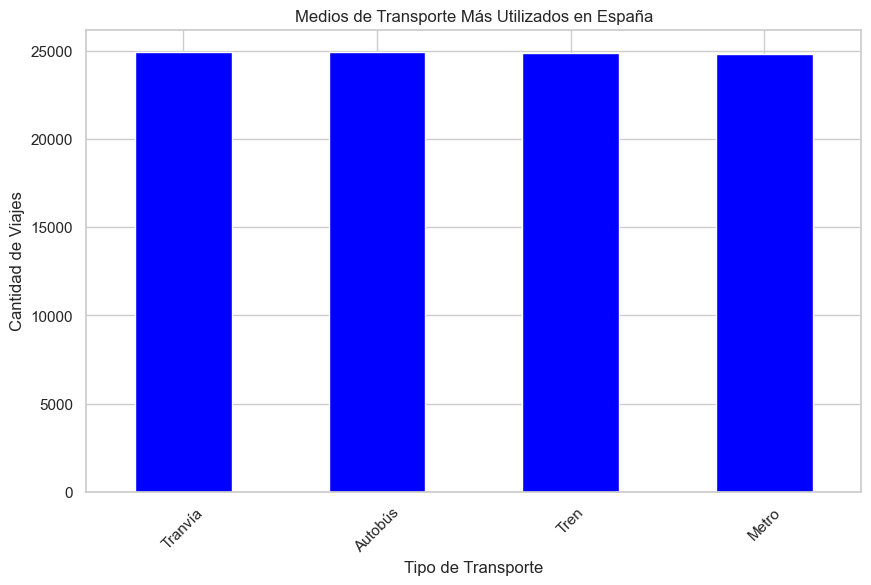

In [17]:
# Ocurrencias de cada tipo de transporte
conteo_transportes = data['Tipo_Transporte'].value_counts()

# Ordenar los resultados para obtener los más populares
top_transportes = conteo_transportes.sort_values(ascending=False)

# Mostrar el top de medios de transporte más utilizados
print("Top de Medios de Transporte Más Utilizados en España:")
print(top_transportes)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
top_transportes.plot(kind='bar', color='blue')
plt.title('Medios de Transporte Más Utilizados en España')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.show()

El gráfico de barras ilustra la cantidad de viajes realizados por cada tipo de transporte.

Todos los medios de transporte tienen un uso bastante uniforme, con diferencias mínimas en la cantidad de viajes realizados.
El tranvía y el autobús son los más utilizados, lo que podría indicar su eficacia.
Aunque trenes y metros también tienen una alta cantidad de viajes, hay una ligera diferencia con respecto a tranvías y autobuses.




#### Preferencia del Uso de Medios de Transporte por Región

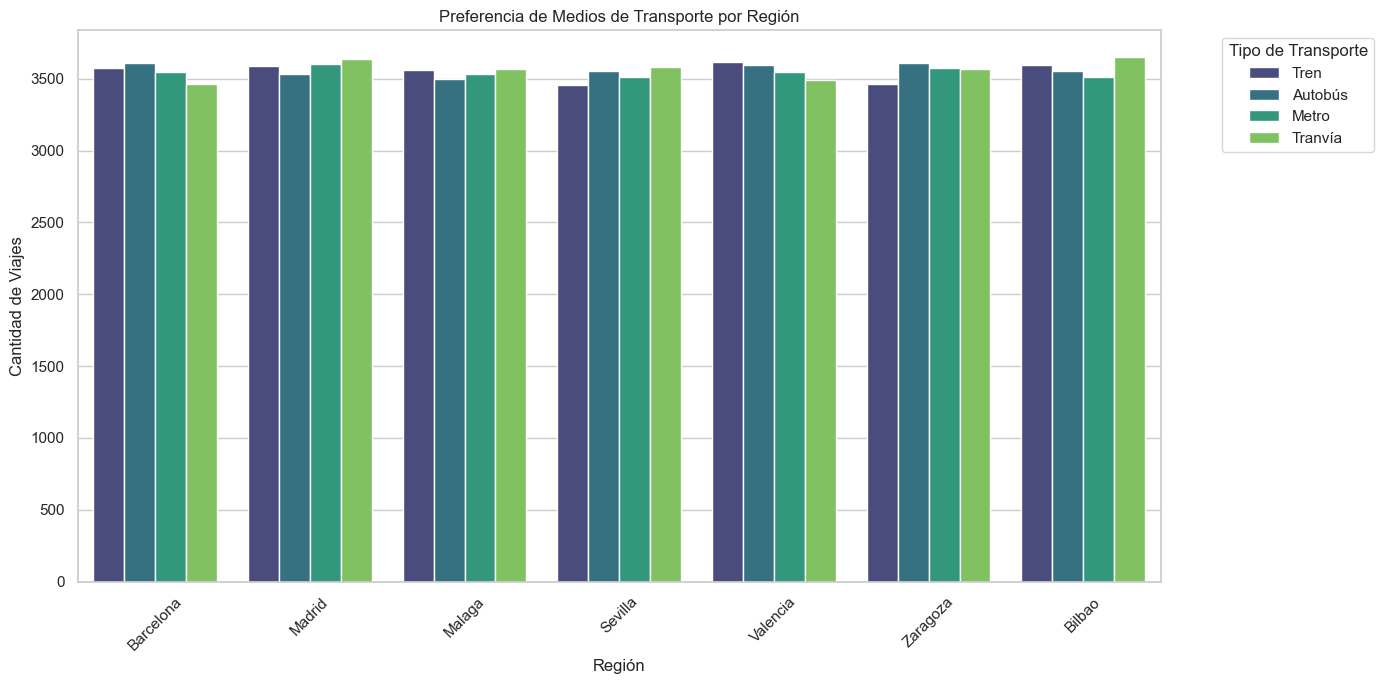

In [19]:
# Gráfico de barras con Seaborn
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Region', hue='Tipo_Transporte', palette='viridis')
plt.title('Preferencia de Medios de Transporte por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Viajes')
plt.legend(title='Tipo de Transporte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El gráfico de barras muestra la cantidad de viajes realizados por cada tipo de transporte en distintas regiones de España. Esta visualización ayuda a entender las preferencias regionales en el uso de los diferentes modos de transporte público.

Las barras son bastante uniformes en altura para cada tipo de transporte dentro de cada región, lo que indica un uso equilibrado de los distintos medios de transporte en la mayoría de las regiones.

**Regiones Específicas:**

*Barcelona y Madrid:* Ambas ciudades muestran una alta y balanceada utilización de trenes, autobuses, metros y tranvías.

*Málaga y Sevilla:* En estas ciudades, se observa un uso ligeramente mayor del metro y tranvía en comparación con los trenes y autobuses.

*Valencia y Zaragoza:* Similar a Barcelona y Madrid, presentan un uso bastante equilibrado de todos los medios de transporte.

*Bilbao:* Aunque similar en distribución, parece tener una leve preferencia por el tranvía.

El análisis de las preferencias de medios de transporte por región muestra un uso equilibrado y diversificado de los distintos modos de transporte público en España. Este equilibrio refleja una infraestructura de transporte bien desarrollada y accesible, que ofrece múltiples opciones a los usuarios y asegura una distribución eficiente del uso del transporte. Las pequeñas variaciones observadas pueden proporcionar insights para futuras mejoras y optimizaciones específicas a nivel regional.

#### Análisis Semanal de la Actividad en el Transporte Público

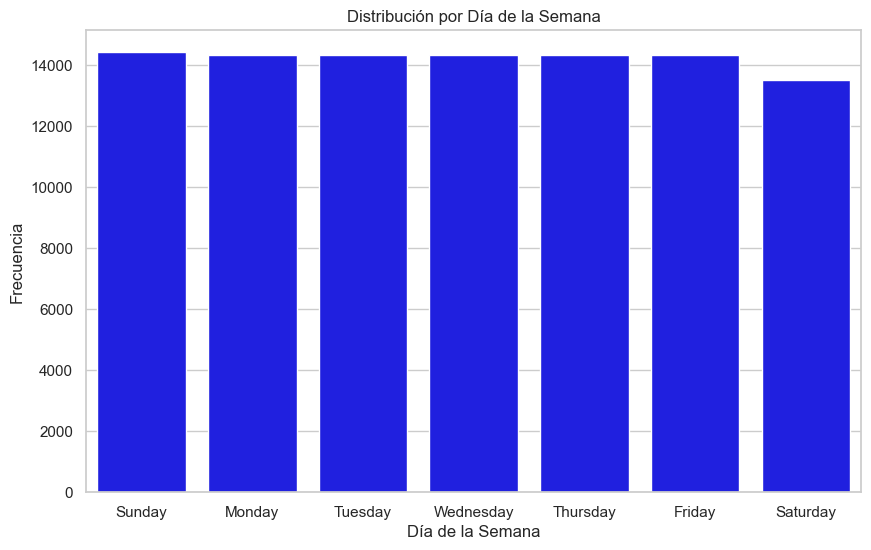

In [20]:
# Distribución de Dia_Semana
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Dia_Semana'], color='blue')
plt.title('Distribución por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.show()

El gráfico de barras muestra la distribución de la cantidad de viajes realizados en el sistema de transporte público para cada día de la semana.

El análisis de la distribución de viajes por día de la semana revela una demanda constante y uniforme del transporte público en España. Esta estabilidad facilita la planificación y operación del servicio, asegurando que los recursos se utilicen de manera eficiente y que los pasajeros puedan confiar en un servicio regular y predecible. Las ligeras variaciones observadas los viernes y sábados proporcionan insights que pueden ser útiles para ajustar levemente los servicios.

#### Frecuencia de Uso de Rutas por Día de la Semana

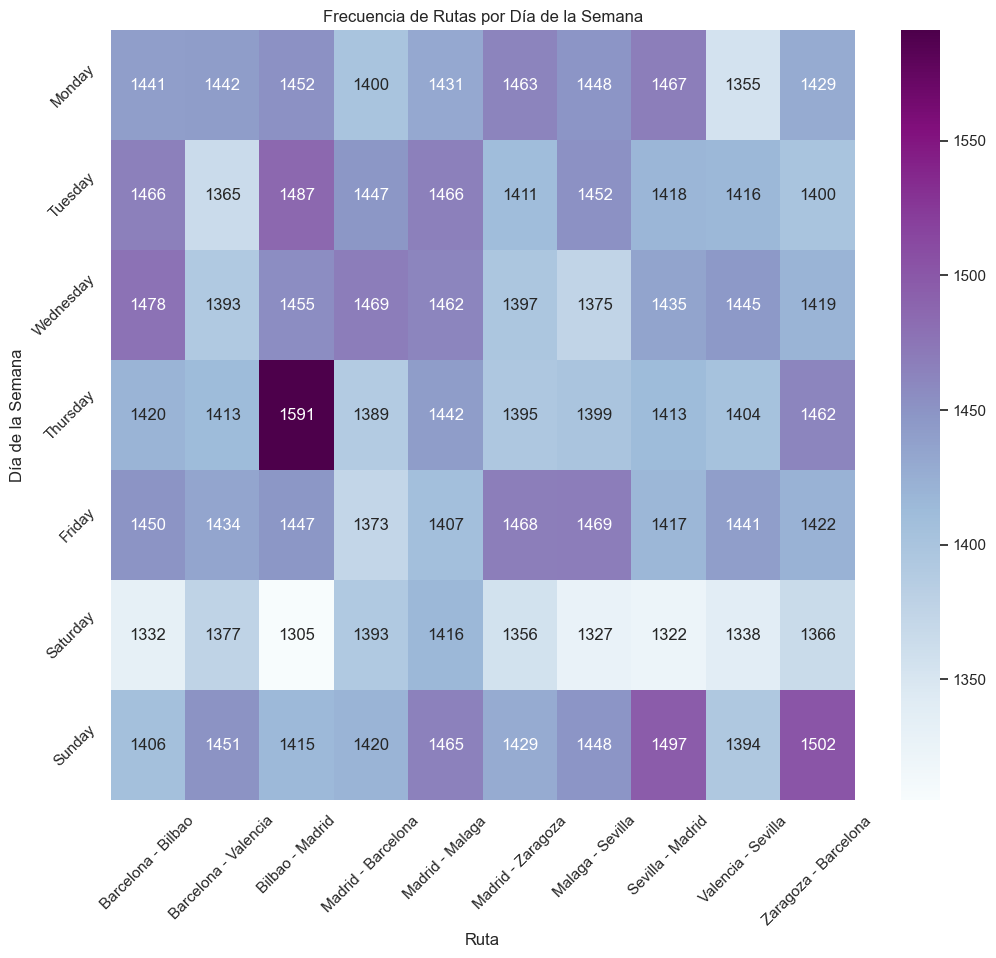

In [21]:
# Corte en las frecuencias de cada ruta por día de la semana
ruta_dia = data.groupby(['Dia_Semana', 'Ruta']).size().unstack(fill_value=0)

# Ordenamineto de los días de la semana en orden cronológico.
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ruta_dia = ruta_dia.reindex(orden_dias)

sns.set(style="white")

plt.figure(figsize=(12, 10))
sns.heatmap(ruta_dia, annot=True, cmap="BuPu", fmt="d")
plt.title('Frecuencia de Rutas por Día de la Semana')
plt.xlabel('Ruta')
plt.ylabel('Día de la Semana')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

El heatmap muestra la frecuencia de viajes realizados en diferentes rutas, distribuidos por los días de la semana. Esta visualización permite identificar patrones y tendencias en el uso de las rutas a lo largo de la semana.

Algunas rutas, como "Madrid - Zaragoza" el jueves, muestran una mayor frecuencia de viajes comparadas con otros días y otras rutas. Esto puede indicar días pico específicos para ciertas rutas.

Los fines de semana (sábado y domingo) suelen tener una menor frecuencia de viajes en comparación con los días laborables.

Rutas como "Madrid - Barcelona" y "Sevilla - Madrid" tienen una alta frecuencia de viajes en casi todos los días de la semana, indicando una alta demanda constante para estas rutas.

"Zaragoza - Barcelona" y "Valencia - Sevilla" también muestran una alta frecuencia, particularmente los domingos y jueves respectivamente.

Comprender los días de mayor y menor demanda puede ayudar a optimizar la programación y la capacidad de los servicios de transporte. Por ejemplo, aumentar la frecuencia de viajes los jueves en la ruta "Madrid - Zaragoza" puede mejorar la satisfacción del usuario.
La menor frecuencia los fines de semana puede indicar la posibilidad de ajustar los recursos durante estos días para aprovechar la capacidad no utilizada.

#### Análisis Horario de la Utilización de Rutas en el Transporte Público

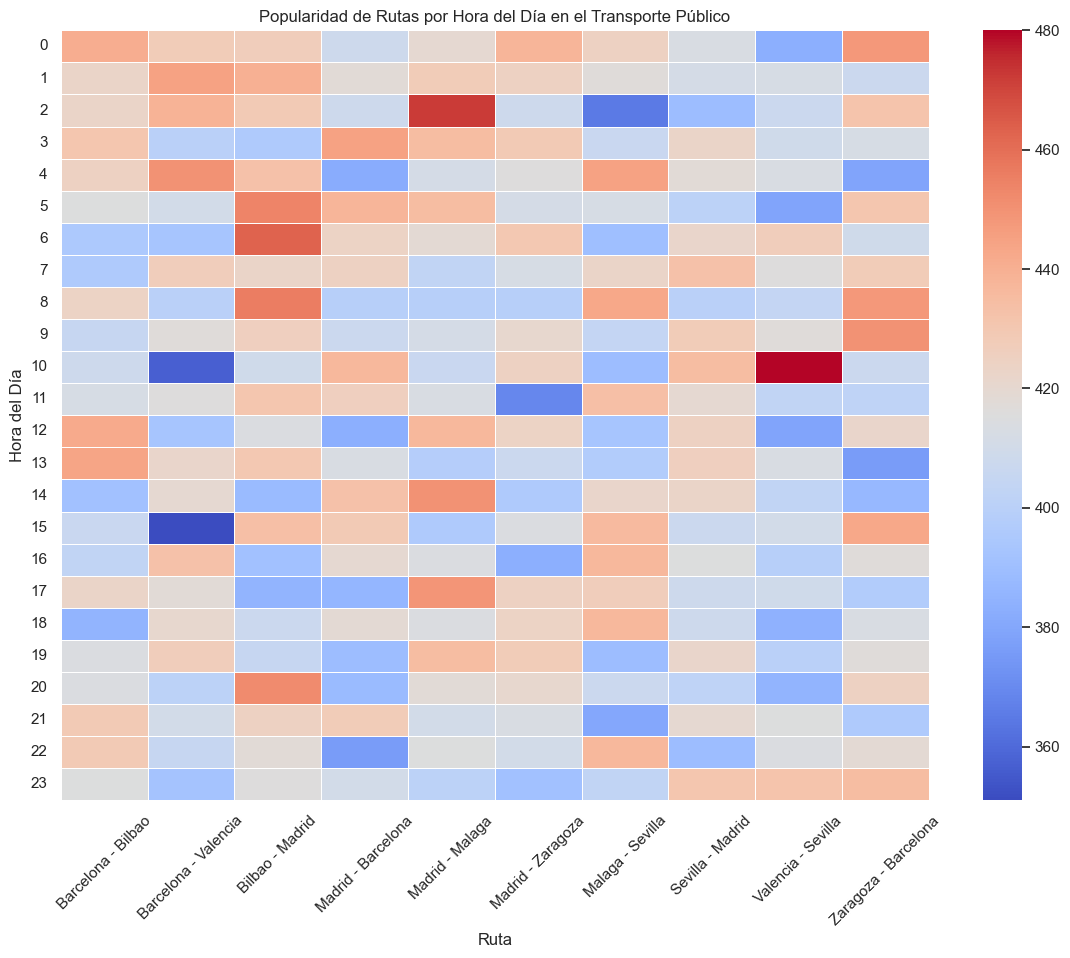

In [22]:
# Extraer la hora de la columna Fecha y se guarda en una nueva columna
data['Hora'] = data['Fecha'].dt.hour

# Agrupar por hora y ruta, y contar las ocurrencias
ruta_hora = data.groupby(['Hora', 'Ruta']).size().unstack(fill_value=0)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))
sns.heatmap(ruta_hora, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Popularidad de Rutas por Hora del Día en el Transporte Público')
plt.xlabel('Ruta')
plt.xticks(rotation=45)
plt.ylabel('Hora del Día')
plt.yticks(rotation=0)
plt.show()

El heatmap muestra la popularidad de las diferentes rutas del transporte público a lo largo del día, segmentado por horas. Esta visualización permite identificar los periodos de mayor y menor uso de cada ruta durante el día.

Se observan picos de popularidad en diferentes horas del día para distintas rutas. Por ejemplo, la ruta "Bilbao - Madrid" muestra una alta popularidad alrededor de las 2 de la madrugada, mientras que "Sevilla - Madrid" tiene un pico significativo a las 15 horas.

Algunas horas del día, como las primeras horas de la mañana (entre las 0 y 5 horas), muestran menor uso en la mayoría de las rutas, lo cual es consistente con patrones típicos de movilidad, donde la actividad es baja durante la madrugada.

La variabilidad en la popularidad de las rutas por hora indica que existen patrones de uso específicos a lo largo del día que podrían estar influenciados por factores como horarios laborales, eventos recurrentes, y actividades sociales.

Comprender estos patrones puede ayudar a optimizar la programación y la frecuencia de los servicios de transporte para alinearse mejor con la demanda.




### Distribución de los retrasos

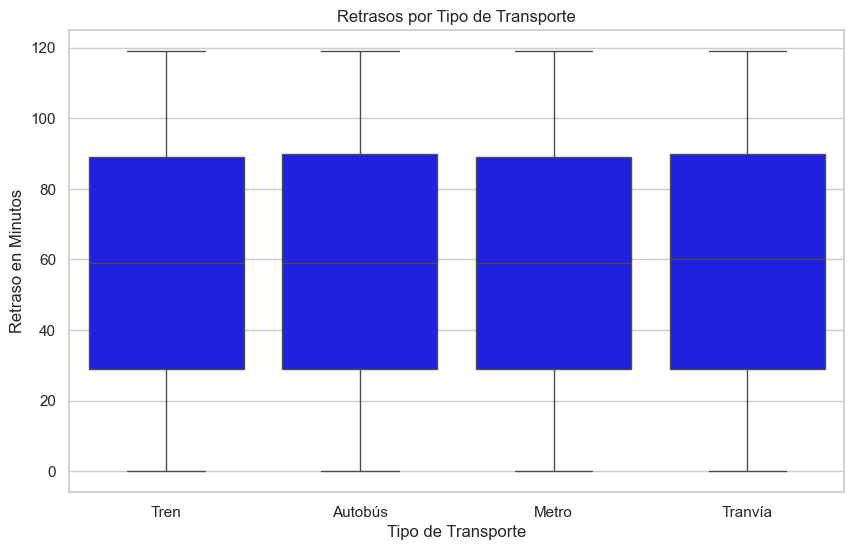

In [23]:
#Retrasos por tipo de transporte
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo_Transporte', y='Retraso_Minutos', data=data, color='blue')
plt.title('Retrasos por Tipo de Transporte')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Retraso en Minutos')
plt.show()

El boxplot muestra la distribución de los retrasos en minutos para cada tipo de transporte: tren, autobús, metro y tranvía. Esta visualización permite comparar la variabilidad y centralidad de los retrasos entre los diferentes modos de transporte.

La mediana de los retrasos es similar para todos los tipos de transporte, situándose alrededor de los 60 minutos. Esto indica que, en promedio, todos los modos de transporte experimentan retrasos de magnitud comparable.

El rango intercuartílico, que encapsula el 50% central de los datos, es también similar entre los distintos tipos de transporte. Los retrasos del tren, autobús, metro y tranvía están generalmente en el rango de 40 a 80 minutos.

Aunque los retrasos son consistentes, la mediana de 60 minutos todavía representa un desafío significativo para la satisfacción del usuario. Reducir esta mediana y el rango intercuartílico podría mejorar considerablemente la experiencia del pasajero.

### Retrasos por tipo de transporte dentro de cada región

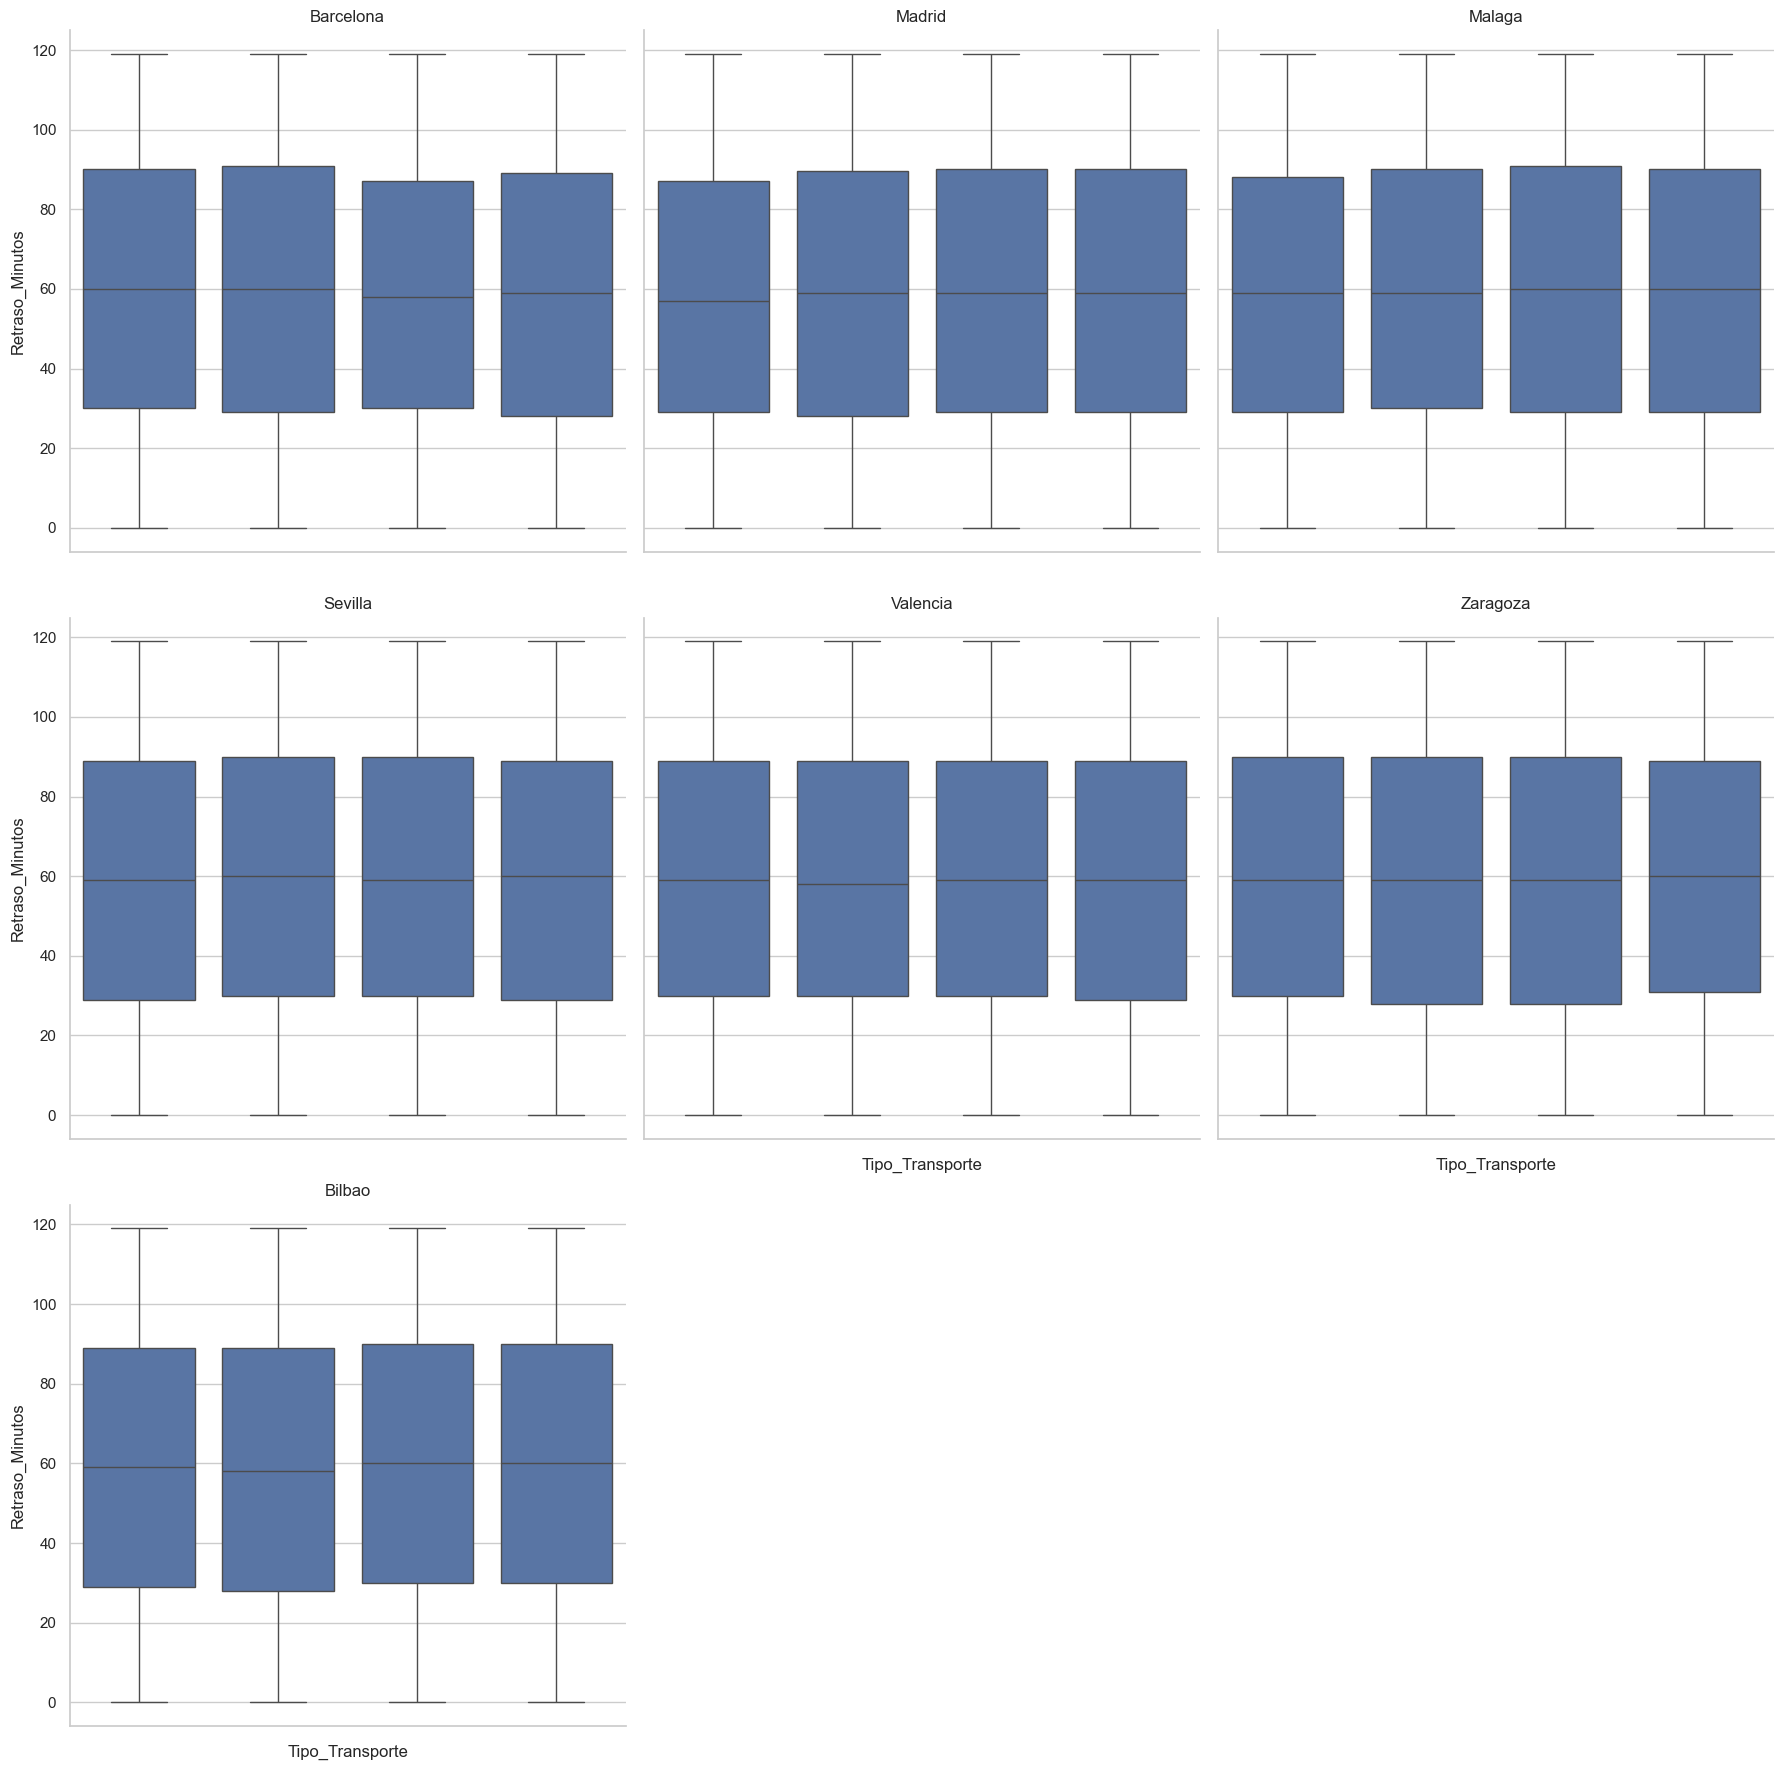

In [24]:
# Determinar el orden de 'Tipo_Transporte'
tipo_transporte_ordenado = data['Tipo_Transporte'].unique()

g = sns.FacetGrid(data, col="Region", col_wrap=3, height=6)
g.map_dataframe(sns.boxplot, x='Tipo_Transporte', y='Retraso_Minutos', order=tipo_transporte_ordenado)
g.set_xticklabels(rotation=45) 
g.set_titles("{col_name}")  
plt.show()

El gráfico FacetGrid con boxplots muestra la distribución de los retrasos en minutos para cada tipo de transporte (tren, autobús, metro y tranvía) en diferentes regiones de España. Esta visualización permite comparar la variabilidad y centralidad de los retrasos entre los distintos modos de transporte en cada región.

En todas las regiones (Barcelona, Madrid, Málaga, Sevilla, Valencia, Zaragoza, Bilbao), la mediana de los retrasos se sitúa de manera similar para los diferentes tipos de transporte, alrededor de los 60 minutos. 

El rango intercuartílico (IQR) es bastante uniforme entre las distintas regiones y tipos de transporte. 

Los bigotes del boxplot se extienden hasta el mínimo y máximo de los retrasos sin mostrar puntos aislados, indicando una distribución más controlada y sin picos anómalos de retrasos extremos en todas las regiones.


#### Análisis de Retrasos Promedio por Ruta

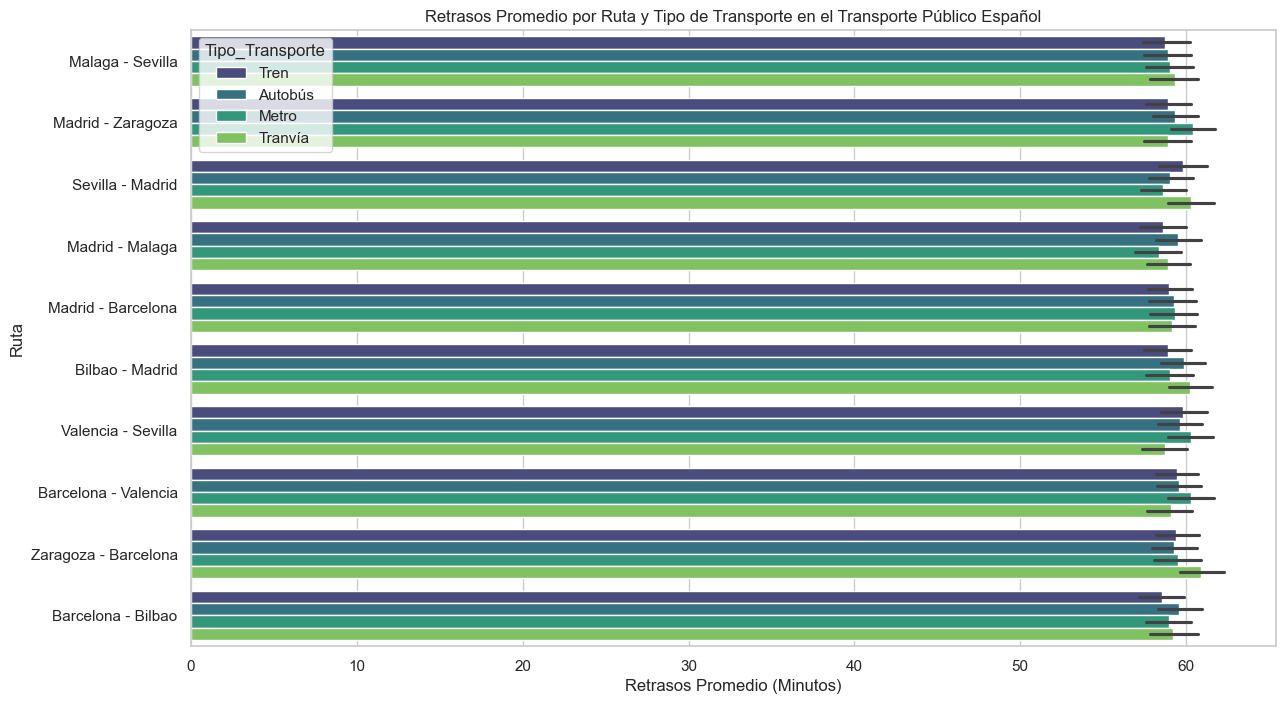

In [25]:
# Calcular el promedio de retrasos por ruta
retrasos_por_ruta = data.groupby('Ruta')['Retraso_Minutos'].mean().sort_values(ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='Retraso_Minutos', y='Ruta', hue='Tipo_Transporte', data=data, palette='viridis')
plt.title('Retrasos Promedio por Ruta y Tipo de Transporte en el Transporte Público Español')
plt.xlabel('Retrasos Promedio (Minutos)')
plt.ylabel('Ruta')
plt.show()

El gráfico de barras muestra los retrasos promedio en minutos para diferentes rutas y tipos de transporte (tren, autobús, metro y tranvía) en el sistema de transporte público español. Esta visualización permite comparar la magnitud de los retrasos entre las distintas rutas y modos de transporte.

La variabilidad en los retrasos promedio también es baja, lo que indica que los tiempos de retraso son predecibles y no varían significativamente entre diferentes tipos de transporte dentro de una misma ruta.

Aunque los retrasos son uniformes, un retraso promedio de 50 a 60 minutos sigue siendo considerable y podría afectar la satisfacción del usuario. Trabajar en reducir estos tiempos puede mejorar la percepción y eficiencia del servicio.

La uniformidad también sugiere que las mejoras implementadas para reducir los retrasos pueden aplicarse de manera generalizada en toda la red de transporte público, en lugar de enfocarse en rutas o tipos de transporte específicos.

In [26]:
# Conteo de frecuencias de las variables categóricas
ruta_counts = data['Ruta'].value_counts()
tipo_transporte_counts = data['Tipo_Transporte'].value_counts()
region_counts = data['Region'].value_counts()
dia_semana_counts = data['Dia_Semana'].value_counts()

print(ruta_counts)
print(tipo_transporte_counts)
print(region_counts)
print(dia_semana_counts)

Ruta
Bilbao - Madrid         10152
Madrid - Malaga         10089
Zaragoza - Barcelona    10000
Barcelona - Bilbao       9993
Sevilla - Madrid         9969
Madrid - Zaragoza        9919
Malaga - Sevilla         9918
Madrid - Barcelona       9891
Barcelona - Valencia     9875
Valencia - Sevilla       9793
Name: count, dtype: int64
Tipo_Transporte
Tranvía    24957
Autobús    24955
Tren       24858
Metro      24829
Name: count, dtype: int64
Region
Madrid       14357
Bilbao       14315
Valencia     14247
Zaragoza     14216
Barcelona    14192
Malaga       14160
Sevilla      14112
Name: count, dtype: int64
Dia_Semana
Sunday       14427
Monday       14328
Tuesday      14328
Wednesday    14328
Thursday     14328
Friday       14328
Saturday     13532
Name: count, dtype: int64


Las rutas entre Bilbao y Madrid, así como Madrid y Málaga, son las más populares.

La frecuencia de viajes en rutas como Zaragoza - Barcelona y Barcelona - Bilbao sugiere una alta demanda en el transporte interurbano.

El uso de tranvía y autobús es ligeramente superior al de tren y metro, aunque la diferencia es mínima. 

La distribución de viajes es notablemente uniforme durante los días laborables (lunes a viernes) con una ligera disminución el sábado.

El domingo tiene la mayor cantidad de viajes, lo cual puede estar relacionado con actividades de ocio y retorno de fines de semana.


In [27]:
# Identificación de rutas con mayores retrasos
top_rutas = data.groupby('Ruta')['Retraso_Minutos'].mean().sort_values(ascending=False).head(5)
print("Rutas con Mayores Retrasos:\n", top_rutas)

Rutas con Mayores Retrasos:
 Ruta
Zaragoza - Barcelona    59.777000
Valencia - Sevilla      59.618707
Barcelona - Valencia    59.583392
Bilbao - Madrid         59.525020
Sevilla - Madrid        59.427024
Name: Retraso_Minutos, dtype: float64


Todas las rutas listadas tienen un retraso promedio cercano a los 60 minutos, lo que representa un impacto considerable en la puntualidad del sistema de transporte.

Las rutas que conectan grandes ciudades, como Zaragoza - Barcelona, Valencia - Sevilla, y Bilbao - Madrid, están entre las que tienen mayores retrasos. Esto podría estar relacionado con factores como la distancia, la congestión del tráfico y la alta demanda.

<div style="background-color:#91FEC0;color:Navy;width:100%;display:inline-block;" >
    <h3 id="sobel">3. Conclusiones y Recomendaciones</h3>
</div>
<br>
<br>

### Conclusión

El análisis exhaustivo del conjunto de datos sobre el transporte público en España ha revelado varias tendencias y áreas críticas que requieren atención para optimizar el sistema y reducir los retrasos. 

La uniformidad en la distribución de tipos de transporte y días de la semana sugiere una infraestructura equilibrada y accesible. Sin embargo, la demanda concentrada en ciertas rutas y regiones indica áreas que podrían beneficiarse de una mayor inversión y optimización para satisfacer mejor las necesidades de los usuarios. Abordar los retrasos promedio también puede mejorar la experiencia general del pasajero y la eficiencia del sistema de transporte público.

A continuación, se resumen los hallazgos clave:

La distribución de tipos de transporte (tranvía, autobús, tren y metro) y la frecuencia de viajes a lo largo de los días de la semana es bastante uniforme. Esto facilita a los usuarios optar por el modo de transporte que más les convenga.

Algunas rutas, como Bilbao - Madrid y Madrid - Málaga, muestran una mayor demanda en comparación con otras. Además, regiones como Madrid, Bilbao y Valencia tienen una cantidad significativamente mayor de viajes, reflejando su importancia económica y demográfica.

Los retrasos promedio se sitúan alrededor de los 50 a 60 minutos, lo que representa un impacto considerable en la puntualidad del sistema. Rutas como Zaragoza - Barcelona y Valencia - Sevilla tienen los mayores retrasos promedio.

La demanda de transporte es constante durante los días laborables, con una ligera disminución los sábados. La popularidad de las rutas también varía a lo largo del día, con picos y valles que reflejan horarios laborales y actividades sociales.

### Recomendaciones

Ajustar los horarios y la frecuencia de los servicios de transporte para alinearse mejor con la demanda en horas pico y en rutas de alta demanda.

Invertir en mejoras de infraestructura en rutas y regiones con alta demanda, como Bilbao - Madrid y Madrid - Málaga. Mejorar la capacidad de las vías, actualizar las estaciones y optimizar los sistemas de señalización pueden contribuir a una mayor eficiencia.
